In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'Crop_recommendation.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.sample(10)

N    P    K  temperature   humidity        ph    rainfall        label
144   69   51   23    22.217382  72.854628  6.801639  106.621316        maize
1836  24   14   33    29.380725  93.275657  6.366220  218.524185      coconut
71    67   45   38    22.727910  82.170688  7.300411  260.887506         rice
1270   6  140  205    17.665584  82.929034  6.313086   69.867126       grapes
976   22    9   44    24.722355  88.876513  5.744362  112.192652  pomegranate
261   51   72   75    18.888525  14.994511  7.104225   80.111338     chickpea
68    69   46   41    23.641248  80.285979  5.012140  263.110330         rice
158   66   44   20    19.078147  69.022986  6.740001   80.725159        maize
1100   2   40   27    29.737700  47.548852  5.954627   90.095869        mango
1882  31   13   33    29.699523  95.212244  6.342464  148.300369      coconut

In [5]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

<Axes: >

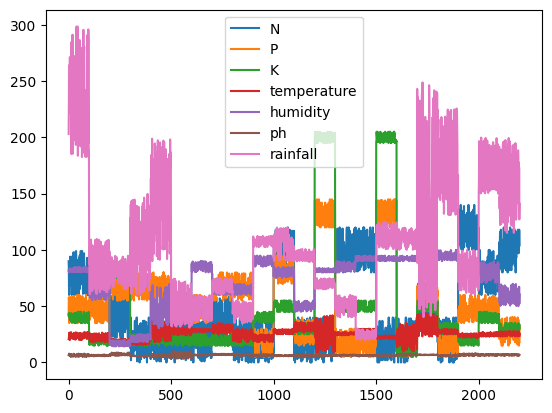

In [7]:
df.plot()

# univariate anlaysis


In [8]:
df['N']

0        90
1        85
2        60
3        74
4        78
       ... 
2195    107
2196     99
2197    118
2198    117
2199    104
Name: N, Length: 2200, dtype: int64

array([[<Axes: title={'center': 'N'}>]], dtype=object)

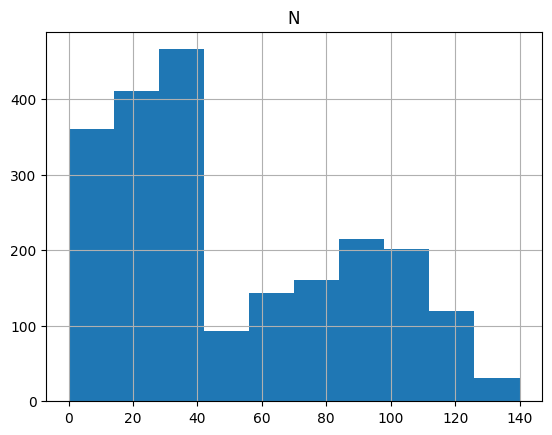

In [9]:
df.hist(column="N")

<Axes: >

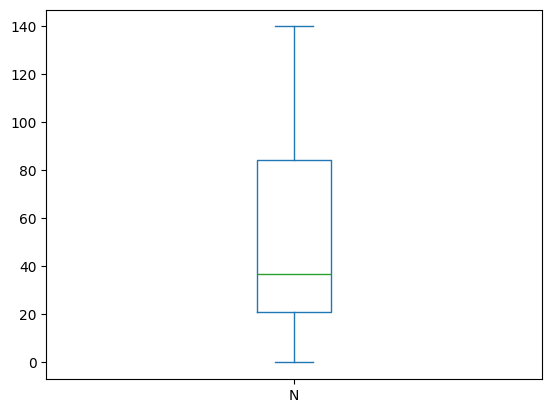

In [10]:
df["N"].plot(kind = 'box')

<Axes: ylabel='Density'>

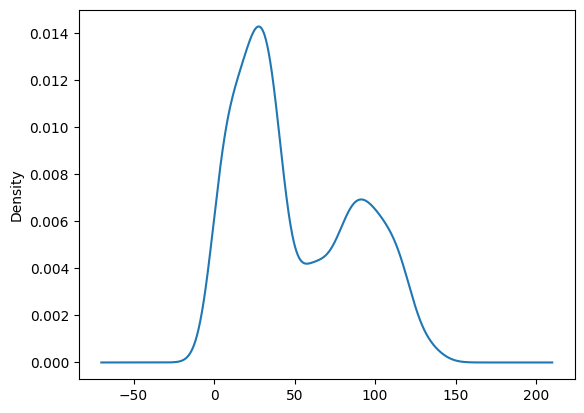

In [11]:

df['N'].plot(kind = 'density')

In [12]:
df['N'].skew()

0.5097213691539147

In [13]:
df['N'].mean()

50.551818181818184

In [14]:
df['N'].mode()

0    22
1    40
Name: N, dtype: int64

In [15]:
df["N"].median()

37.0

In [16]:
from pydantic_settings import BaseSettings


In [17]:
from ydata_profiling import ProfileReport

In [18]:
profile = ProfileReport(df,title="Farm_dataset")

In [19]:
profile.to_notebook_iframe

<bound method ProfileReport.to_notebook_iframe of >

In [20]:
from pandas_profiling import ProfileReport
import pandas as pd


profile = ProfileReport(df)
profile.to_notebook_iframe()

C:\Users\hsang.000\AppData\Local\Temp\ipykernel_6984\2239111320.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# processing part

In [21]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [23]:
df['label']=le.fit_transform(df['label'])

In [24]:
df['label']

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
df_transformed = df.drop('label',axis='columns')

In [28]:
scaler.fit(df_transformed)

StandardScaler()

In [29]:
df_transformed = scaler.transform(df_transformed)

In [30]:
  df_transformed

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [31]:
X = df_transformed
Y = df['label'].values

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [36]:
clf = RandomForestClassifier()

In [37]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
y_pred = clf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
score1= accuracy_score(y_test,y_pred)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [41]:
neigh.fit(X,Y)

KNeighborsClassifier(n_neighbors=3)

In [42]:
y_pred1 = neigh.predict(X_test)

In [43]:
score2=accuracy_score(y_test, y_pred1)
print(score2)

0.9834710743801653


In [44]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()

In [45]:
lrmodel.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred2 = lrmodel.predict(X_test)

In [47]:
score3=accuracy_score(y_test,y_pred2)
print(score3)

0.9641873278236914


In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt_model = DecisionTreeClassifier()

In [50]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred3 = dt_model.predict(X_test)

In [52]:
score4=accuracy_score(y_test,y_pred3)
print(score4)

0.9724517906336089


In [53]:
y_pred2=lrmodel.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred2)

0.9641873278236914

In [55]:
score3

0.9641873278236914

In [56]:
from sklearn.pipeline import Pipeline

# boosting


In [57]:
from sklearn.ensemble import AdaBoostClassifier

# Assume base_models is a list of trained scikit-learn models
base_models = [clf, neigh, lrmodel, dt_model]

# Initialize AdaBoost classifier with base models
boosting_classifier = AdaBoostClassifier(base_estimator=None, n_estimators=50)

# Fit the AdaBoost classifier
boosting_classifier.fit(X_train, y_train)

# Evaluate the boosted model
accuracy = boosting_classifier.score(X_test, y_test)
print("Boosted Model Accuracy:", accuracy)

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [58]:
from sklearn.ensemble import AdaBoostClassifier

# Assume base_models is a list of trained scikit-learn models
base_models = [clf, neigh, lrmodel, dt_model]

# Initialize AdaBoost classifier with base models
boosting_classifier = AdaBoostClassifier(n_estimators=100,  learning_rate=1.0, algorithm='SAMME.R')

# Fit the AdaBoost classifier
boosting_classifier.fit(X_train, y_train)

# Evaluate the boosted model
accuracy = boosting_classifier.score(X_test, y_test)
print("Boosted Model Accuracy:", accuracy)

c:\Users\hsang.000\Desktop\Major Project\Code\crop-recommendation-system\backend\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosted Model Accuracy: 0.1584022038567493


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Assume base_models is a list of trained scikit-learn models
base_models = [clf, neigh, lrmodel, dt_model]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Make predictions on the training data using base models
predictions_train = []
for base_model in base_models:
    predictions_train.append(base_model.predict(X_train))

# Stack the predictions as features for the meta-model
X_train_meta = np.column_stack(predictions_train)

# Initialize and train the meta-model (blender)
meta_model = DecisionTreeClassifier(max_depth=1)
meta_model.fit(X_train_meta, y_train)

# Make predictions on the testing data using base models
predictions_test = []
for base_model in base_models:
    predictions_test.append(base_model.predict(X_test))

# Stack the predictions as features for the meta-model
X_test_meta = np.column_stack(predictions_test)

# Make the final predictions using the meta-model
final_predictions = meta_model.predict(X_test_meta)

# Calculate accuracy of the final prediction
accuracy = accuracy_score(y_test, final_predictions)
print("Boosted Model Accuracy:", accuracy)


Boosted Model Accuracy: 0.06818181818181818


In [60]:
import tensorflow as tf


In [61]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\hsang.000\Desktop\Major Project\Code\crop-recommendation-system\backend\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0955 - loss: 2.9446 - val_accuracy: 0.4517 - val_loss: 2.3806
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5476 - loss: 2.1228 - val_accuracy: 0.6477 - val_loss: 1.5487
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7527 - loss: 1.2986 - val_accuracy: 0.8182 - val_loss: 0.9113
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8736 - loss: 0.7728 - val_accuracy: 0.8693 - val_loss: 0.6103
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9063 - loss: 0.5148 - val_accuracy: 0.8920 - val_loss: 0.4621
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9168 - loss: 0.3900 - val_accuracy: 0.9091 - val_loss: 0.3726
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9394 - loss: 0.3018 - val_accuracy: 0.9318 - val_loss: 0.2997
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9530 - loss: 0.2501 - val_accuracy: 0.9347 - val_loss:

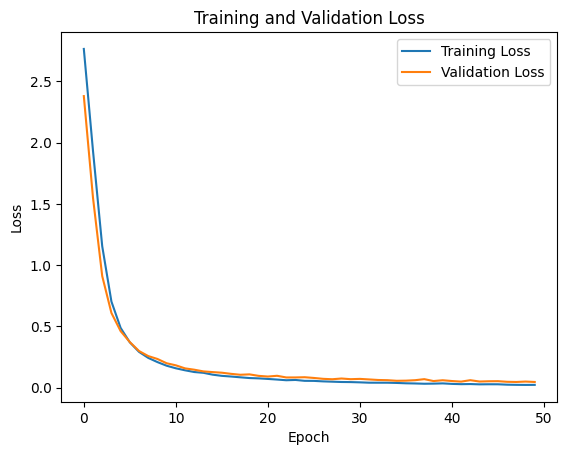

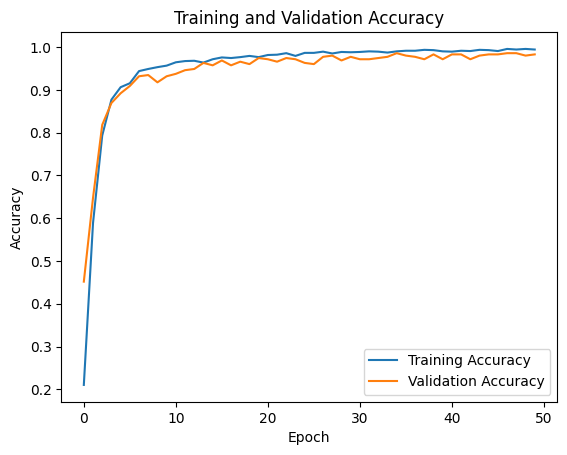

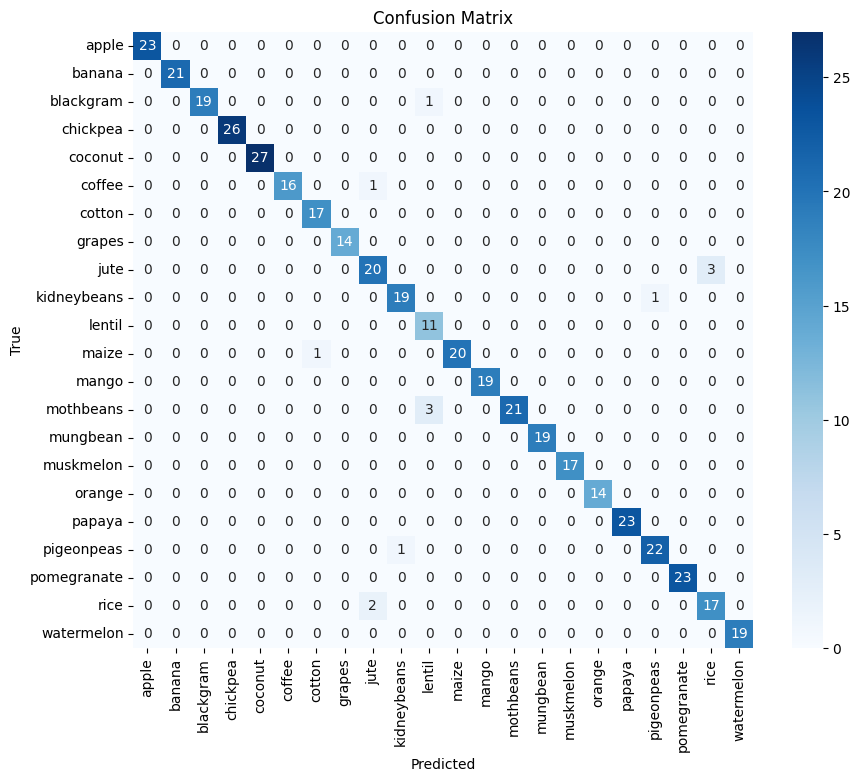

In [62]:
df = pd.read_csv(r'Crop_recommendation.csv')

# Convert labels to numeric values
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split data into features and labels
X = df.drop(columns=['label'])
y = df['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(df['label'].unique()), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Make predictions
predictions = np.argmax(model.predict(X_test), axis=-1)
predicted_labels = label_encoder.inverse_transform(predictions)
print("Predicted labels:", predicted_labels)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()